In [1]:
import numpy as np
import pandas as pd

In [2]:
clean_data = pd.read_csv("clean_data_2.csv")
clean_data.shape

(1584, 134)

In [3]:
clean_data['Valence'].value_counts(normalize=True)

Positive    0.5
Negative    0.5
Name: Valence, dtype: float64

In [4]:
# Distribution of label

print('Training Positive:', len(clean_data[(clean_data['Type'] == 'Training') & (clean_data['Valence'] == 'Positive')]))
print('Training Negative:', len(clean_data[(clean_data['Type'] == 'Training') & (clean_data['Valence'] == 'Negative')]))
print('Testing Positive:', len(clean_data[(clean_data['Type'] == 'Testing') & (clean_data['Valence'] == 'Positive')]))
print('Testing Negative:', len(clean_data[(clean_data['Type'] == 'Testing') & (clean_data['Valence'] == 'Negative')]))

Training Positive: 168
Training Negative: 168
Testing Positive: 624
Testing Negative: 624


In [5]:
# split training testing

train_data = clean_data[clean_data['Type'] == 'Training']
test_data = clean_data[clean_data['Type'] == 'Testing']

In [6]:
train_data_X = train_data.loc[:, ~train_data.columns.isin(['Type', 'Valence', 'Time', 'Time.1'])]
train_data_y = train_data.loc[:, 'Valence']

test_data_X = test_data.loc[:, ~test_data.columns.isin(['Type', 'Valence', 'Time', 'Time.1'])]
test_data_y = test_data.loc[:, 'Valence']

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, Normalizer, MaxAbsScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal, uniform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

In [8]:
# choosing model
# https://stackoverflow.com/questions/2595176/which-machine-learning-classifier-to-choose-in-general

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ])
hp = {
            'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
            'classifier': [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]
        }
grid = RandomizedSearchCV(pipe, hp, n_iter=25, scoring='accuracy', n_jobs=1, cv=10, random_state=42)
final = grid.fit(train_data_X, train_data_y)
final.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [9]:
final.best_score_

0.9157754010695186

In [10]:
from pandas import DataFrame   
result_df = DataFrame.from_dict(final.cv_results_, orient='columns')
result_df[["params", "mean_test_score"]]

,params,mean_test_score
0,"{'scaler': StandardScaler(), 'classifier': SVC()}",0.915775
1,"{'scaler': RobustScaler(), 'classifier': SVC()}",0.894920
2,"{'scaler': MinMaxScaler(), 'classifier': SVC()}",0.915775
3,"{'scaler': Normalizer(), 'classifier': SVC()}",0.913458
4,"{'scaler': MaxAbsScaler(), 'classifier': SVC()}",0.915775
5,"{'scaler': StandardScaler(), 'classifier': Dec...",0.889305
6,"{'scaler': RobustScaler(), 'classifier': Decis...",0.892513
7,"{'scaler': MinMaxScaler(), 'classifier': Decis...",0.889305
8,"{'scaler': Normalizer(), 'classifier': Decisio...",0.841622
9,"{'scaler': MaxAbsScaler(), 'classifier': Decis...",0.889305


In [11]:
final.best_estimator_.score(test_data_X, test_data_y)

# super sad :( I think it's overfit

0.4807692307692308

In [12]:
# hyperparemeter tuning for LinearSVC

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('classifier', LinearSVC())
                      ],
                     memory=None)

params = {"classifier__C":[0.1, 1, 10, 100, 1000]
#          "classifier__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
#          "classifier__kernel": ['rbf','linear']
         }
 
grid_linsvc = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_linsvc.fit(train_data_X, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_linsvc.best_params_) 

print("accuracy :",grid_linsvc.best_score_*100)

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converg

tuned hyperparameters :(best parameters)  {'classifier__C': 10}
accuracy : 77.0499108734403


/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converg

In [13]:
grid_predictions = grid_linsvc.best_estimator_.predict(test_data_X) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 54.09%


In [14]:
# hyperparameter tuning for linear SVC without scaling

# Penalty
penalty = ['l1','l2']
# Dual
dual = [True, False]
# C
c = [0.1, 1, 10, 100, 1000]

# Create the random grid
random_grid = {'penalty': penalty,
               'dual': dual,
               'C': c}

# First create the base model to tune
lin_svc = LinearSVC()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lin_svc_random = RandomizedSearchCV(estimator = lin_svc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
lin_svc_random.fit(train_data_X, train_data_y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklear

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converg

RandomizedSearchCV(cv=10, estimator=LinearSVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'dual': [True, False],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, verbose=2)

In [15]:
result_df_lin_svc = DataFrame.from_dict(lin_svc_random.cv_results_, orient='columns')
result_df_lin_svc[["params", "mean_test_score"]]

,params,mean_test_score
0,"{'penalty': 'l1', 'dual': True, 'C': 0.1}",NaN
1,"{'penalty': 'l2', 'dual': True, 'C': 0.1}",0.812834
2,"{'penalty': 'l1', 'dual': False, 'C': 0.1}",0.750267
3,"{'penalty': 'l2', 'dual': False, 'C': 0.1}",0.762478
4,"{'penalty': 'l1', 'dual': True, 'C': 1}",NaN
5,"{'penalty': 'l2', 'dual': True, 'C': 1}",0.851693
6,"{'penalty': 'l1', 'dual': False, 'C': 1}",0.785918
7,"{'penalty': 'l2', 'dual': False, 'C': 1}",0.750178
8,"{'penalty': 'l1', 'dual': True, 'C': 10}",NaN
9,"{'penalty': 'l2', 'dual': True, 'C': 10}",0.836809


In [16]:
lin_svc_random.best_estimator_

LinearSVC(C=1)

In [17]:
lin_svc_random.best_estimator_.score(test_data_X, test_data_y)

0.5641025641025641

In [18]:
lin_svc_fay = LinearSVC(C=1000, dual=False, class_weight='balanced', max_iter = 100, random_state=42)
lin_svc_fay.fit(train_data_X, train_data_y)
predictions = lin_svc_fay.predict(test_data_X)

print('training accuracy:', np.mean(cross_val_score(lin_svc_fay,train_data_X, train_data_y,cv=10,scoring="accuracy")))
print('testing accuracy:', accuracy_score(test_data_y, predictions))
print('confusion matrix:', confusion_matrix(test_data_y, predictions))

# https://datascience.stackexchange.com/questions/28426/train-accuracy-vs-test-accuracy-vs-confusion-matrix

training accuracy: 0.7621212121212121
testing accuracy: 0.6001602564102564
confusion matrix: [[268 356]
 [143 481]]


In [19]:
# hyperparameter tuning SVC with scaling

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('classifier', SVC())
                      ],
                     memory=None)

params = {"classifier__C":[0.1, 1, 10, 100, 1000],
          "classifier__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
          "classifier__kernel": ['rbf','linear']
         }
 
grid_svc = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_svc.fit(train_data_X, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_svc.best_params_) 

print("accuracy :",grid_svc.best_score_*100)

tuned hyperparameters :(best parameters)  {'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
accuracy : 93.39572192513369


In [20]:
grid_predictions = grid_svc.predict(test_data_X) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 48.32%


In [21]:
# trying SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data_X.astype(np.float32))
X_test_scaled = scaler.transform(test_data_X.astype(np.float32))

# gamma = scale, with default parameter
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled, train_data_y)

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(train_data_y, y_pred) #without CV

0.9791666666666666

In [22]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled, train_data_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .........C=8.89599417215, gamma=0.04635034844812419; total time=   0.0s
[CV] END .........C=8.89599417215, gamma=0.04635034844812419; total time=   0.0s
[CV] END .........C=8.89599417215, gamma=0.04635034844812419; total time=   0.0s
[CV] END ..C=10.486150971849629, gamma=0.0019276107379122963; total time=   0.0s
[CV] END ..C=10.486150971849629, gamma=0.0019276107379122963; total time=   0.0s
[CV] END ..C=10.486150971849629, gamma=0.0019276107379122963; total time=   0.0s
[CV] END ....C=5.511674504498554, gamma=0.015590764921133201; total time=   0.0s
[CV] END ....C=5.511674504498554, gamma=0.015590764921133201; total time=   0.0s
[CV] END ....C=5.511674504498554, gamma=0.015590764921133201; total time=   0.0s
[CV] END ......C=9.811079815161968, gamma=0.0269346312135426; total time=   0.0s
[CV] END ......C=9.811079815161968, gamma=0.0269346312135426; total time=   0.0s
[CV] END ......C=9.811079815161968, gamma=0.0269

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ca43160>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ca42560>},
                   verbose=2)

In [23]:
rnd_search_cv.best_estimator_

SVC(C=3.120345495614109, gamma=0.0018681731111548656)

In [24]:
rnd_search_cv.best_score_

0.9315476190476191

In [25]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, train_data_y)

SVC(C=3.120345495614109, gamma=0.0018681731111548656)

In [26]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(test_data_y, y_pred)

# super sad

0.4807692307692308

In [28]:
# feature selection together with training cv

svc = SVC(C=1.2651512390740796, gamma=0.001986330440153654)

pp = Pipeline([('selector', SelectKBest(f_classif, k = 10)),
                       ('classifier', svc)])
fc_random = {
    'selector__k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
}

svc_random_pp = RandomizedSearchCV(estimator = pp, param_distributions = fc_random, n_iter = 11, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
svc_random_pp.fit(X_train_scaled, train_data_y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('selector', SelectKBest()),
                                             ('classifier',
                                              SVC(C=1.2651512390740796,
                                                  gamma=0.001986330440153654))]),
                   n_iter=11, n_jobs=-1,
                   param_distributions={'selector__k': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100, 110,
                                                        120, 130]},
                   random_state=42, verbose=2)

In [29]:
result_df_rf_pp = DataFrame.from_dict(svc_random_pp.cv_results_, orient='columns')
result_df_rf_pp[["params", "mean_test_score"]]

,params,mean_test_score
0,{'selector__k': 120},0.930927
1,{'selector__k': 100},0.936898
2,{'selector__k': 10},0.886720
3,{'selector__k': 90},0.933957
4,{'selector__k': 60},0.927807
5,{'selector__k': 30},0.916399
6,{'selector__k': 20},0.916399
7,{'selector__k': 130},0.930927
8,{'selector__k': 50},0.933957
9,{'selector__k': 80},0.933957


In [30]:
print(svc_random_pp.best_estimator_.score(X_test_scaled, test_data_y))

#damn sad. why overfit tho :(

0.48157051282051283


<AxesSubplot:>

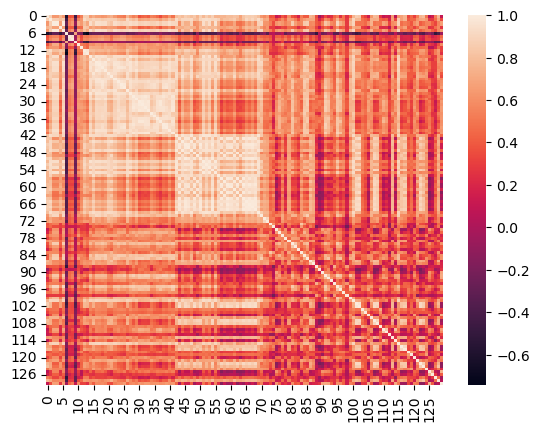

In [31]:
# reduce dimensionality with PCA

import seaborn as sns

sns.heatmap(pd.DataFrame(X_train_scaled).corr())

In [32]:
pca = PCA(n_components = 10)
pca.fit(X_train_scaled)
data_pca_X = pca.transform(X_train_scaled)
data_pca_test_X = pca.transform(X_test_scaled)

<AxesSubplot:>

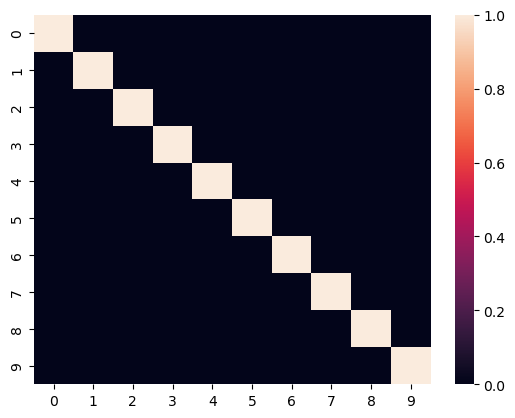

In [33]:
sns.heatmap(pd.DataFrame(data_pca_X).corr())

In [34]:
# C
c = [0.1, 1, 10, 100, 1000]

# kernel
kernel = ['linear', 'rbf']

# gamma
gamma = [0.1, 1, 10, 100]

# Create the random grid
random_grid = {'kernel': kernel,
#               'gamma': gamma,
               'C': c}

# First create the base model to tune
svc = SVC()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
svc_random.fit(data_pca_X, train_data_y)

# it takes too long when the data is not scaled

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, verbose=2)

In [35]:
print("tuned hyperparameters :(best parameters) ",svc_random.best_params_) 

print("accuracy :",svc_random.best_score_*100)

tuned hyperparameters :(best parameters)  {'kernel': 'rbf', 'C': 0.1}
accuracy : 91.36904761904762


In [36]:
print('testing accuracy:', svc_random.best_estimator_.score(data_pca_test_X, test_data_y))

testing accuracy: 0.48157051282051283


In [37]:
# selecting features with feature importance permutation

my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_data_X, train_data_y)

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lin_svc_fay, random_state=1).fit(test_data_X, test_data_y)
eli5.show_weights(perm, feature_names = test_data_X.columns.tolist(), top=100)

Weight,Feature
0.0689 ± 0.0087,EMG
0.0304 ± 0.0199,EEGa
0.0292 ± 0.0065,EMG.2
0.0205 ± 0.0095,EEGa.13
0.0171 ± 0.0072,EEGb.5
0.0146 ± 0.0116,EEGa.1
0.0141 ± 0.0052,EEGg.12
0.0135 ± 0.0233,EEGg.4
0.0120 ± 0.0068,EEGa.7
0.0117 ± 0.0128,ACC.1


In [39]:
def permutation_importance_feature(model, X, y, n_repeats):
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=42)
    chosen_feats = []
    
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] >0:
            chosen_feats.append(X.columns[i])
    
    return chosen_feats, result

In [40]:
chosen, result = permutation_importance_feature(lin_svc_fay, train_data_X, train_data_y, 30)

In [41]:
chosen

['ACC.1',
 'EEGa',
 'EEGb',
 'EEGa.13',
 'EEGb.5',
 'EMG.2',
 'EMG',
 'EEGa.1',
 'EEGa.8',
 'EEGg.4',
 'EEGg.13',
 'EEGth.13',
 'EEGb.6',
 'EEGth.3',
 'EEGa.10',
 'EOG.2',
 'EEGb.10',
 'EEGa.12',
 'EOG.3',
 'EEGa.9',
 'EEGth.12',
 'EEGa.7',
 'EEGa.4',
 'EEGg.5',
 'EEGth.1',
 'EEGb.8',
 'EEGg.12',
 'EEGa.3',
 'EEGb.12',
 'EEGg',
 'EEGth.10',
 'EEGb.3',
 'EEGg.1',
 'EEGa.5',
 'EEGth.6',
 'EEGth.9',
 'EEGth.2',
 'EEGg.7',
 'EEGa.11',
 'EEGb.13',
 'EEGth',
 'EEGg.8',
 'EEGg.6',
 'EEGth.8',
 'EEGb.4',
 'EEGa.6',
 'EEGb.1',
 'EEGth.7',
 'EEGg.10',
 'EEGg.2',
 'EEGb.2',
 'EMG.1',
 'EEGg.3',
 'EEGth.11',
 'EEGth.4']

[CV] END ....................................selector__k=120; total time=   0.0s
[CV] END ....................................selector__k=100; total time=   0.0s
[CV] END .....................................selector__k=10; total time=   0.0s
[CV] END .....................................selector__k=10; total time=   0.0s
[CV] END .....................................selector__k=10; total time=   0.0s
[CV] END .....................................selector__k=90; total time=   0.0s
[CV] END .....................................selector__k=90; total time=   0.0s
[CV] END .....................................selector__k=60; total time=   0.0s
[CV] END .....................................selector__k=60; total time=   0.0s
[CV] END .....................................selector__k=20; total time=   0.0s
[CV] END .....................................selector__k=20; total time=   0.0s
[CV] END .....................................selector__k=50; total time=   0.0s
[CV] END ...................

[CV] END ....................................selector__k=120; total time=   0.0s
[CV] END ....................................selector__k=120; total time=   0.0s
[CV] END ....................................selector__k=120; total time=   0.0s
[CV] END ....................................selector__k=100; total time=   0.0s
[CV] END ....................................selector__k=100; total time=   0.0s
[CV] END ....................................selector__k=100; total time=   0.0s
[CV] END ....................................selector__k=100; total time=   0.0s
[CV] END .....................................selector__k=10; total time=   0.0s
[CV] END .....................................selector__k=90; total time=   0.0s
[CV] END .....................................selector__k=90; total time=   0.0s
[CV] END .....................................selector__k=30; total time=   0.0s
[CV] END .....................................selector__k=30; total time=   0.0s
[CV] END ...................

In [42]:
train_data_X_perm = train_data_X[chosen]
test_data_X_perm = test_data_X[chosen]

In [43]:
# linear SVC

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('classifier', LinearSVC())
                      ],
                     memory=None)

params = {"classifier__C":[0.1, 1, 10, 100, 1000]
#          "classifier__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
#          "classifier__kernel": ['rbf','linear']
         }
 
grid_linsvc = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_linsvc.fit(train_data_X_perm, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_linsvc.best_params_) 

print("accuracy :",grid_linsvc.best_score_*100)

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converg

tuned hyperparameters :(best parameters)  {'classifier__C': 0.1}
accuracy : 75.90017825311944


/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converg

In [44]:
grid_predictions = grid_linsvc.best_estimator_.predict(test_data_X_perm) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 60.10%


In [45]:
# SVC

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('classifier', SVC())
                      ],
                     memory=None)

params = {"classifier__C":[0.1, 1, 10, 100, 1000],
          "classifier__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
          "classifier__kernel": ['rbf','linear']
         }
 
grid_svc = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_svc.fit(train_data_X_perm, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_svc.best_params_) 

print("accuracy :",grid_svc.best_score_*100)

tuned hyperparameters :(best parameters)  {'classifier__C': 100, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}
accuracy : 92.52228163992869


In [46]:
grid_predictions = grid_svc.best_estimator_.predict(test_data_X_perm) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 50.00%


In [47]:
# LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('classifier', LogisticRegression(max_iter=200))
                      ],
                     memory=None)

params = {"classifier__solver": solvers,
          "classifier__penalty": penalty,
          "classifier__C": c_values
         }
 
grid_lr = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_lr.fit(train_data_X_perm, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_lr.best_params_) 

print("accuracy :",grid_lr.best_score_*100)

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

tuned hyperparameters :(best parameters)  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
accuracy : 91.3458110516934


In [48]:
grid_predictions = grid_svc.best_estimator_.predict(test_data_X_perm) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 50.00%


In [49]:
# Decision Tree

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
splitter = ["best", "random"]

# Create the random grid
params = {'classifier__max_features': max_features,
            'classifier__max_depth': max_depth,
            'classifier__min_samples_split': min_samples_split,
            'classifier__min_samples_leaf': min_samples_leaf,
            'classifier__splitter': splitter}

pipeline = Pipeline([
                     ('scaler', MinMaxScaler()),
                     ('classifier', DecisionTreeClassifier())
                      ],
                     memory=None)
 
grid_dt = GridSearchCV(pipeline, params, refit = True, verbose =0,cv=10)
  
# fitting the model for grid search
grid_dt.fit(train_data_X_perm, train_data_y)

print("tuned hyperparameters :(best parameters) ",grid_dt.best_params_) 

print("accuracy :",grid_dt.best_score_*100)

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_feature

tuned hyperparameters :(best parameters)  {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__splitter': 'random'}
accuracy : 95.45454545454547


In [50]:
grid_predictions = grid_dt.best_estimator_.predict(test_data_X_perm) 
test_accuracy=accuracy_score(test_data_y,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 49.84%


In [51]:
# Choosing Model

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ])
hp = {
            'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
            'classifier': [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]
        }
grid = RandomizedSearchCV(pipe, hp, n_iter=25, scoring='accuracy', n_jobs=1, cv=10, random_state=42)
final = grid.fit(train_data_X_perm, train_data_y)
final.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeClassifier())])

In [52]:
final.best_score_

0.9212121212121211

In [53]:
result_df = DataFrame.from_dict(final.cv_results_, orient='columns')
result_df[["params", "mean_test_score"]]

,params,mean_test_score
0,"{'scaler': StandardScaler(), 'classifier': SVC()}",0.900624
1,"{'scaler': RobustScaler(), 'classifier': SVC()}",0.885829
2,"{'scaler': MinMaxScaler(), 'classifier': SVC()}",0.888770
3,"{'scaler': Normalizer(), 'classifier': SVC()}",0.913458
4,"{'scaler': MaxAbsScaler(), 'classifier': SVC()}",0.900624
5,"{'scaler': StandardScaler(), 'classifier': Dec...",0.910071
6,"{'scaler': RobustScaler(), 'classifier': Decis...",0.910071
7,"{'scaler': MinMaxScaler(), 'classifier': Decis...",0.921212
8,"{'scaler': Normalizer(), 'classifier': Decisio...",0.877718
9,"{'scaler': MaxAbsScaler(), 'classifier': Decis...",0.879412


In [54]:
final.best_estimator_.score(test_data_X_perm, test_data_y)

0.5